# Fire up graphlab create

In [2]:
import graphlab

In [3]:
sales = graphlab.SFrame('home_data.gl/')

This trial license of GraphLab Create is assigned to 519589356@qq.com and will expire on July 24, 2016. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.


[INFO] graphlab.cython.cy_server: GraphLab Create v1.10.1 started. Logging: C:\Users\51958\AppData\Local\Temp\graphlab_server_1467073684.log.0


In [4]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [4]:
sales.show()

Canvas is accessible via web browser at the URL: http://localhost:53455/index.html
Opening Canvas in default web browser.


In [6]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot",x="sqft_living",y="price")

# 建立一个简单的面积与价格回归模型

In [7]:
train_data,test_data = sales.random_split(.8,seed=0)

## 建立回归模型

In [8]:
sqft_model = graphlab.linear_regression.create(train_data,target="price",features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16507

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.014628     | 4342152.220609     | 1959262.977568       | 263436.044722 | 253518.710429   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

## 评估模型

In [9]:
print test_data['price'].mean()

543054.042563


In [10]:
print sqft_model.evaluate(test_data)

{'max_error': 4137694.174551924, 'rmse': 255202.04418506465}


## 看看预测结果

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

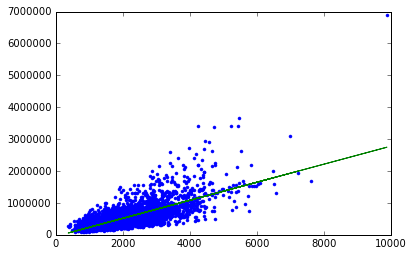

In [12]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',test_data['sqft_living'],sqft_model.predict(test_data),'-')

In [13]:
self_model.get('coefficients')

NameError: name 'self_model' is not defined

In [14]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-48184.8803366,5071.43877633
sqft_living,None,282.658312011,2.22938921982


## 浏览数据中的其他特征

In [16]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [6]:
graphlab.canvas.set_target('ipynb')
sales.show(view="BoxWhisker Plot",x="zipcode",y="price")

### 作业题1

In [10]:
temp1 = sales[sales['zipcode']=='98039']
temp1.select_column('price').mean()

2160606.5999999996

### 作业题2

In [34]:
temp2 = sales.filter_by(range(2001,4001),'sqft_living')
float(temp2.num_rows())/sales.num_rows()
#help(sales.filter_by)

0.42187572294452413

### 作业题3

In [43]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]
train_data,test_data = sales.random_split(.8,seed=0)
original_model = graphlab.linear_regression.create(train_data,target="price",features=my_features,validation_set=None)
advanced_model = graphlab.linear_regression.create(train_data,target="price",features=advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.019057     | 3763208.270523     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.042703     | 3469012.450686     | 154580.940736 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [45]:
original_rmse =original_model.evaluate(test_data)['rmse']
advanced_rmse =advanced_model.evaluate(test_data)['rmse']
print original_rmse-advanced_rmse

22711.3165105


## 用更多的特征建立回归模型

In [20]:
my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16525

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.031280     | 3757347.823975     | 2063717.666182       | 181343.881395 | 195698.273433   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [21]:
print my_features

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [22]:
print sqft_model.evaluate(test_data)
print my_features_model.evaluate(test_data)

{'max_error': 4137694.174551924, 'rmse': 255202.04418506465}
{'max_error': 3490599.282950992, 'rmse': 179625.50835487313}


# 应用学习模型预测3个房屋的价格

In [23]:
house1 = sales[sales['id']=='5309101200']

In [24]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [25]:
house1['price']

dtype: int
Rows: ?
[620000L, ... ]

In [26]:
print sqft_model.predict(house1)

[630195.0684887838]


In [27]:
print my_features_model.predict(house1)

[722502.3290301991]


## 预测第二个房屋

In [28]:
house2 = sales[sales['id']=='1925069082']

In [29]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [30]:
print sqft_model.predict(house2)

[1263349.6873924974]


In [31]:
print my_features_model.predict(house2)

[1404706.8684696113]


## 最后一个房屋

In [ ]:
bill_gates = sales[sales['id']]